<div style="color:#483838; padding:0px 10px; border-radius:5px; font-size:18px; text-align:center"><h1 style='margin:10px 5px'>Misiing Values</h1>
</div>

- __01) Kinds of missing values__
- __02)import data and EDA__
- __03)Extarcting missing values__
- __04)Replacing missing values:__
- **a)mean**
- **b)remove**
- **c)random**
- **d)KNN Imputer** 

## 01) Kinds of missing values

- Common missng values are **NAN** (not a number) and **NULL**(none).
- Sometimes, for instaance we have -10 in the column of age which is not showing an age or 0 in column of blood pressure and as we know, there is no 0 blood pressure, so we should care about all numbers and check them, since these are missing values too.
- If we do not have 5 to 10 percent of data in a columns, mean is a good choice for replacing.
- If we are not able to find a soloution in order to replace missing values, then we remove that.
- If a column does not have 80 percent of data, we omit that column.


## 02)import data and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_raw  = pd.read_csv("G:\\Data_analyst\\05)data prepration\\heart.csv")
data = data_raw.copy()    #make a copy in order to compare data

__01)Data Exploratory__

In [3]:
data_raw.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data_raw.shape

(918, 12)

In [5]:
data_raw.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- As confidence level goes upper the sample size get bigger.
- Margin of Error: Is the error we face, when we generalize the outcom on sample to the population.

## 03)Extarcting missing values

In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- There is no null or NAN value in data,but in Cholesterol column we have 0 values which are our missed values.

In [7]:
data[data.Cholesterol == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


- There is 172 zeroz in cholestrol column, and we should change them to null in order to be able to replace them with correct values.

- We should replace 0 valuse here with null value, in order to be able to decide to replace the with a correct value. 

In [20]:
data.replace({"Cholesterol":0},np.nan,inplace=True)

In [47]:
data_copy.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

- Here we have 0 in RestingBP column which shows blood presure,and is not correct.

In [24]:
data[data.RestingBP == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,NaN,0,Normal,155,N,1.5,Flat,1


- Here we have one 0 value in this column.

In [26]:
data.replace({"RestingBP":0},np.nan,inplace=True)

In [27]:
data.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

## 04)Replacing missing valuse:

#####  1)mean:

- Note that using these methode should not causes data to lose it's structure.(distribution)
- Let's plot Cholesterol hist before and after replacing missing values.

<function matplotlib.pyplot.show(close=None, block=None)>

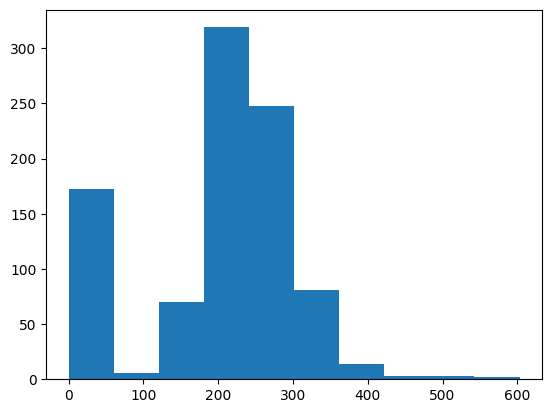

In [112]:
plt.hist(data_raw.Cholesterol)
plt.show

- Replacing missing values using mean:

In [92]:
# Make a copy of data:
data_copy = data.copy()
data_copy.replace({"Cholesterol" : 0},np.nan,inplace=True)

In [93]:
# Repplacing missing values in Cholesterol with mean value:

In [94]:
data_copy.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [95]:
# replace nan in columns Cholesterol with mean:

In [96]:
m = data_copy[data_copy.Cholesterol !=np.nan].Cholesterol.mean()
m

244.6353887399464

In [97]:
data_copy.replace({"Cholesterol":np.nan},m,inplace=True)

In [98]:
data_copy.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         1
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [99]:
# Now let's check the distribution:

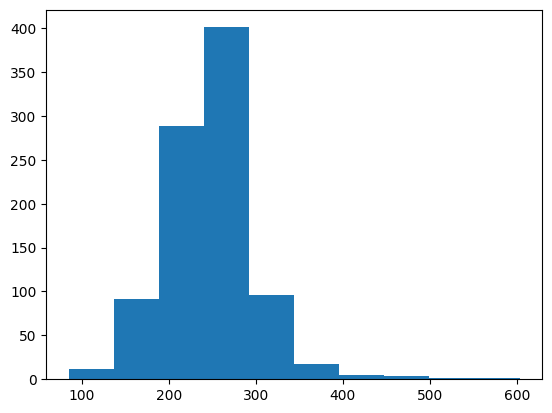

In [100]:
plt.hist(data_copy.Cholesterol)
plt.show()

- Here we can see the frequency, where mean affected it is too high.
-  we will learn more methods in future.

In [102]:
# Replace nan in RestingBP with mean value:
data_copy.replace(data_copy.RestingBP == 0,np.nan,inplace=True)

In [103]:
m1 = data_copy[data_copy.RestingBP != np.nan].RestingBP.mean()
m1

132.54089422028352

In [109]:
data_copy.replace({"RestingBP" :np.nan},m1,inplace=True)

In [110]:
data_copy.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- Note that using mean is good to use in case we have lost only 5 to 10 percent of our data.

##### 2)removing

- in replacing missing values, when a column or row does not have 80 percent of data it is better to omit them.

##### 03)random

- Using random values in order to replace nan values is not a good idea since it might disturb our distribution.

#### 04)KNN Imputer:

- This method is the best method among all above, but it has cost, meaning it needs more time and use processing resources.

- The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.(K is the number of neigbors,which we choose.)
- Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature.
- The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. 
- If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed.
-  When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. 
-  If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation.
-  If a feature is always missing in training, it is removed during transform. 
- ref : https://scikit-learn.org/stable/modules/impute.html#knnimpute

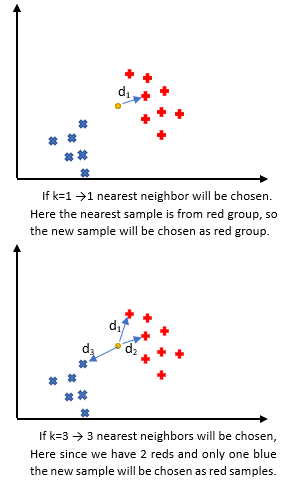

- Note that k must be odd numberand not so big, 3,5,7 are good chooses.